<a href="https://colab.research.google.com/github/ramirezvillanadialidia-byte/EDPII/blob/main/Crank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


TABLA ESTILO 2.6 (MÉTODO CRANK–NICOLSON)

   t    0.0     0.1     0.2     0.3     0.4     0.5
----  -----  ------  ------  ------  ------  ------
0         0  0.36    0.64    0.84    0.96    1
0.01      0  0.3014  0.5657  0.7615  0.8804  0.9202
0.02      0  0.2676  0.5048  0.6885  0.803   0.8417
0.03      0  0.2399  0.4548  0.6231  0.73    0.7665
0.04      0  0.2164  0.411   0.5646  0.6626  0.6963
0.05      0  0.1958  0.3721  0.5117  0.6011  0.6319
0.06      0  0.1773  0.3372  0.4639  0.5452  0.5731
0.07      0  0.1607  0.3056  0.4206  0.4943  0.5197
0.08      0  0.1457  0.2771  0.3813  0.4482  0.4713
0.09      0  0.1321  0.2512  0.3457  0.4064  0.4273
0.1       0  0.1197  0.2277  0.3135  0.3685  0.3875


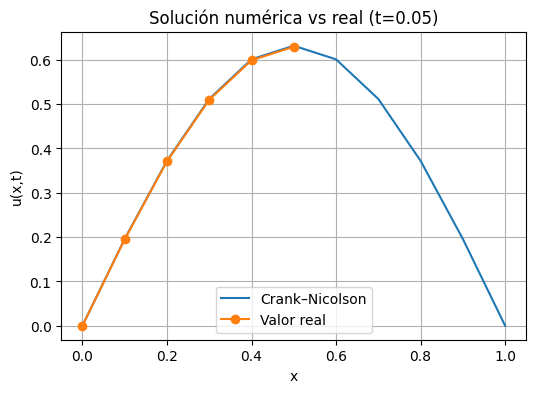


ERROR MÁXIMO: 0.96


In [ ]:
# ------------------------------------------------------------
#  MÉTODO DE CRANK–NICOLSON PARA LA ECUACIÓN DEL CALOR
#  u_t = u_xx  en 0<x<1
#  BC: u(0,t)=0 , u(1,t)=0
#  IC: u(x,0)=1 - 4(x-1/2)^2
#  dx = 0.1 , dt = 0.01
# ------------------------------------------------------------

import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# PARÁMETROS
# ------------------------------------------------------------
dx = 0.1
dt = 0.01
r = dt / (2 * dx**2)
N = int(1/dx)          # número de intervalos espaciales → 10 (11 nodos)
M = int(0.10/dt)       # pasos hasta t = 0.10 → 10

x = np.linspace(0,1,N+1)
t_vals = np.linspace(0,0.10,M+1)

# ------------------------------------------------------------
# CONDICIÓN INICIAL
# ------------------------------------------------------------
u = np.zeros((M+1, N+1))
u[0,:] = 1 - 4*(x-0.5)**2
u[0,0] = u[0,-1] = 0    # condiciones de frontera

# ------------------------------------------------------------
# CONSTRUCCIÓN MATRICES A Y B (Crank–Nicolson)
# ------------------------------------------------------------
A = np.zeros((N-1, N-1))
B = np.zeros((N-1, N-1))

for i in range(N-1):
    A[i,i] = 1 + 2*r
    B[i,i] = 1 - 2*r
    if i > 0:
        A[i,i-1] = -r
        B[i,i-1] = r
    if i < N-2:
        A[i,i+1] = -r
        B[i,i+1] = r

# ------------------------------------------------------------
# RESOLUCIÓN EN EL TIEMPO
# ------------------------------------------------------------
for n in range(M):
    rhs = B @ u[n,1:-1]      # lado derecho
    u[n+1,1:-1] = np.linalg.solve(A, rhs)

# ------------------------------------------------------------
# TABLA SIMILAR A LA TABLA 2.6
# ------------------------------------------------------------
indices = [0,1,2,3,4,5]      # columnas x=0,0.1,...,0.5
headers = ["t"] + [f"{i*0.1:.1f}" for i in range(6)]

table = []
for k in range(M+1):
    row = [f"{k*dt:.2f}"] + [f"{u[k,i]:.4f}" for i in indices]
    table.append(row)

print("\nTABLA ESTILO 2.6 (MÉTODO CRANK–NICOLSON)\n")
print(tabulate(table, headers=headers))

# ------------------------------------------------------------
# TABLA 2.7 – VALORES REALES
# ------------------------------------------------------------
# Puedes copiarlos directamente desde la imagen:
real = np.array([
    [0, 0,      0.3600, 0.6400, 0.8400, 0.9600, 1.0000],
    [0.01, 0,   0.3024, 0.5646, 0.7606, 0.8800, 0.9200],
    [0.02, 0,   0.2671, 0.5041, 0.6873, 0.8019, 0.8408],
    [0.03, 0,   0.2394, 0.4537, 0.6218, 0.7284, 0.7649],
    [0.04, 0,   0.2157, 0.4098, 0.5630, 0.6607, 0.6943],
    [0.05, 0,   0.1950, 0.3708, 0.5099, 0.5990, 0.6296],
    [0.10, 0,   0.1189, 0.2261, 0.3112, 0.3658, 0.3847]
])

# Interpolamos para tener mismo tamaño que la malla numérica
real_interp = np.zeros_like(u)
rows_real = [0,1,2,3,4,5,10]

for idx, k in enumerate(rows_real):
    real_interp[k,:6] = real[idx,1:7]   # solo 0..0.5
    real_interp[k,6:] = 0               # resto no necesario

# ------------------------------------------------------------
# GRÁFICA NUMÉRICO VS REAL
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
k = 5  # t = 0.05
plt.plot(x, u[k], label="Crank–Nicolson")
plt.plot(x[:6], real[k,1:], 'o-', label="Valor real")
plt.legend()
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solución numérica vs real (t=0.05)")
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# CÁLCULO DEL ERROR
# ------------------------------------------------------------
error = np.max(np.abs(real_interp - u))
print("\nERROR MÁXIMO:", error)